<a href="https://colab.research.google.com/github/Just-Fajar/Just-Fajar/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mengatur agar semua kolom ditampilkan saat print DataFrame
pd.set_option('display.max_columns', None)

# Mengatur agar plot ditampilkan
%matplotlib inline

**1. BUSINESS UNDERSTANDING**

In [ ]:
print("="*80)
print("ANALISIS FAKTOR RISIKO PENYAKIT JANTUNG (CRISP-DM)")
print("="*80)


ANALISIS FAKTOR RISIKO PENYAKIT JANTUNG (CRISP-DM)


**2. DATA UNDERSTANDING**


[Tahap 2] Data Understanding
--------------------------------------------------
Silakan pilih file dataset (CSV atau XLSX) untuk diunggah.


Saving heart_disease_dataset.xlsx to heart_disease_dataset (1).xlsx

Membaca file: heart_disease_dataset (1).xlsx...
Berhasil memuat dataset: heart_disease_dataset (1).xlsx

Data (5 Baris Pertama):
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   67    1   2       111   536    0        2       88      0      1.3      3   
1   57    1   3       109   107    0        2      119      0      5.4      2   
2   43    1   4       171   508    0        1      113      0      3.7      3   
3   71    0   4        90   523    0        2      152      0      4.7      2   
4   36    1   2       119   131    0        2      128      0      5.9      3   

   ca  thal  smoking  diabetes   bmi  heart_disease  
0   2     3        1         0  23.4              1  
1   0     3        0         1  35.4              0  
2   0     7        1         1  29.9              0  
3   1     3        1         0  15.2              1  
4   1     3        1         0  16.7         

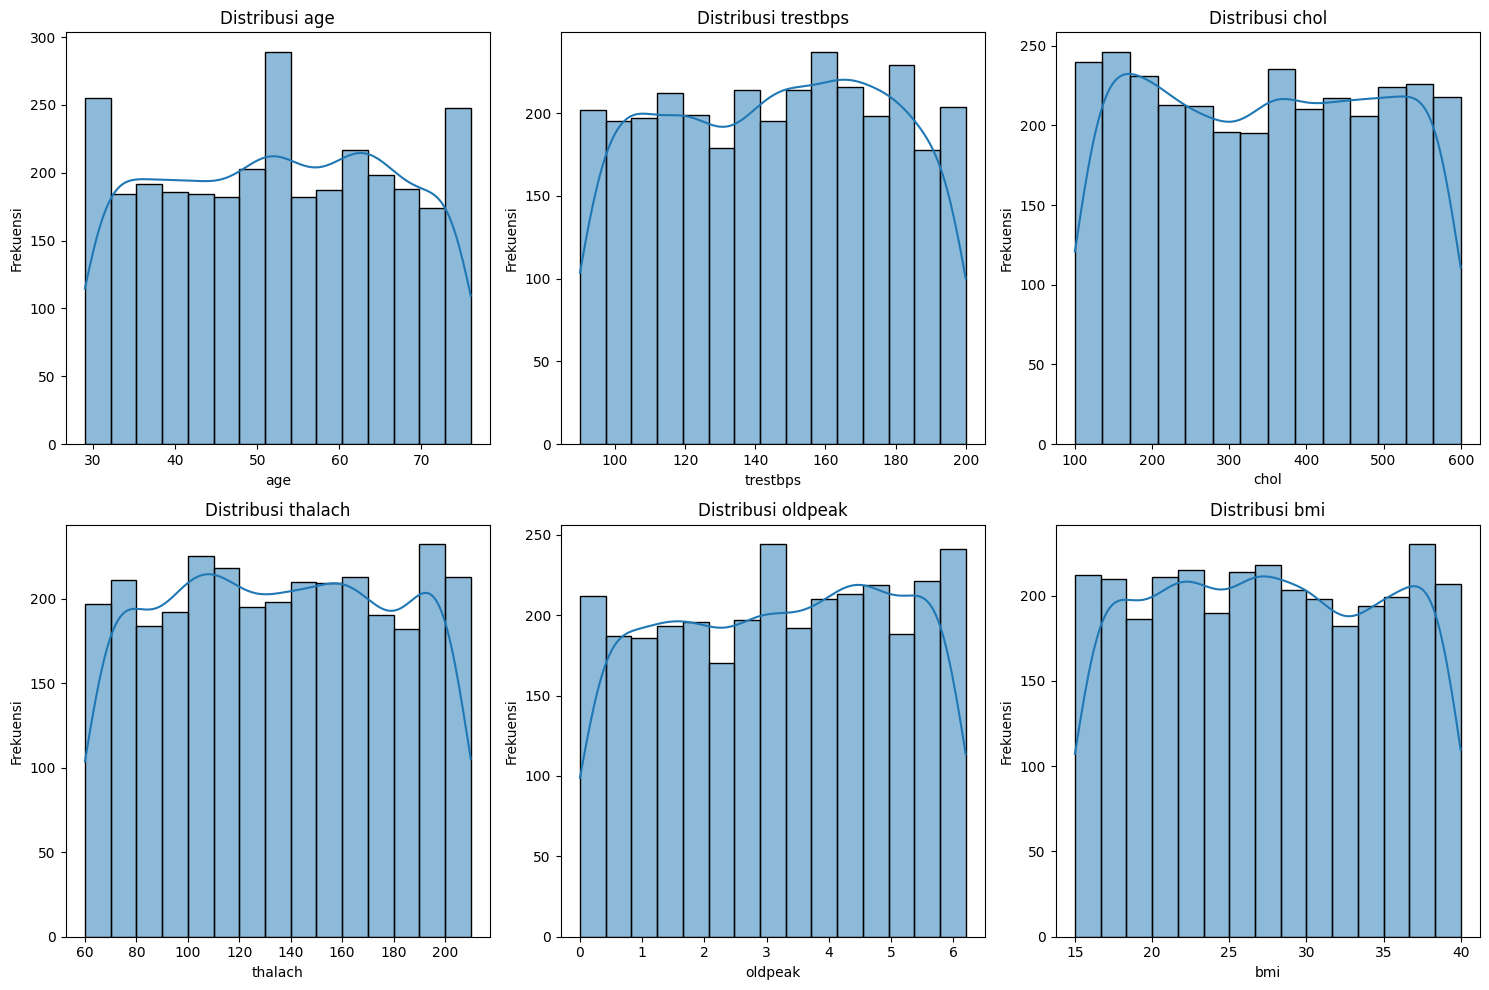

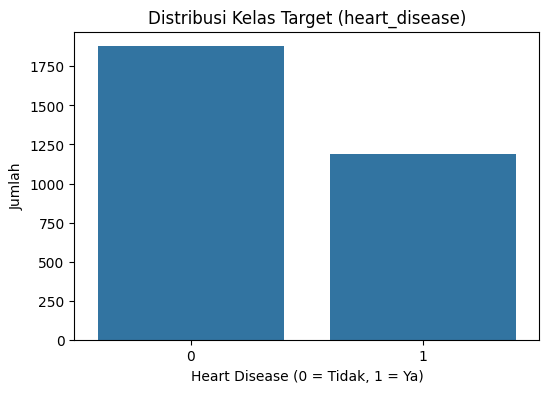

heart_disease
0    0.611926
1    0.388074
Name: proportion, dtype: float64


Visualisasi Korelasi (Correlation Heatmap)...


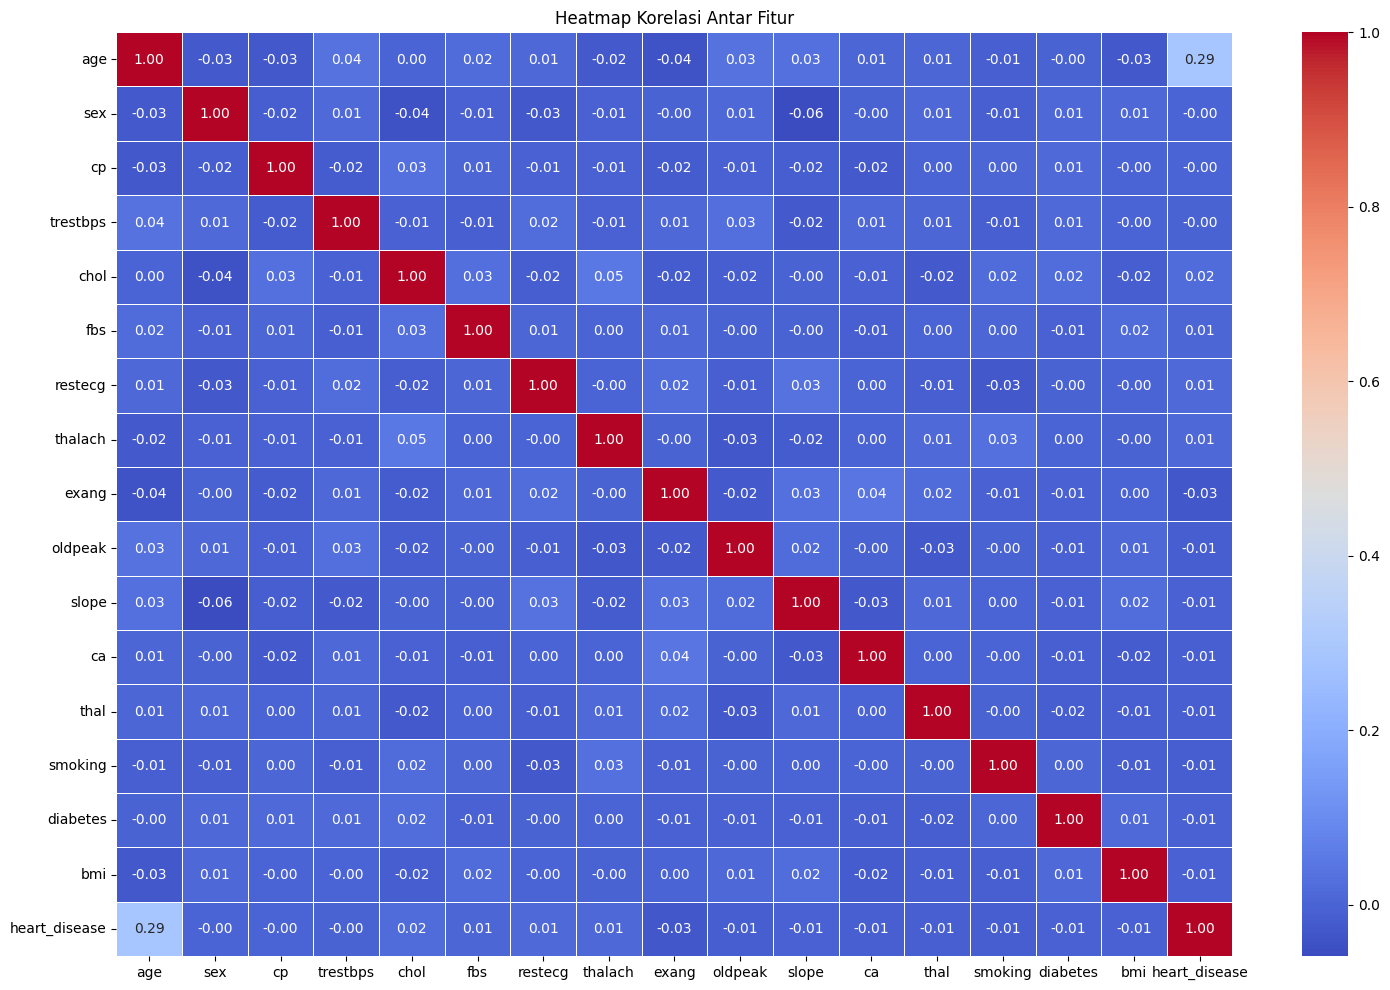



Pengecekan Kualitas Data:
Jumlah Missing Values per Kolom:
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
smoking          0
diabetes         0
bmi              0
heart_disease    0
dtype: int64


Jumlah Data Duplikat: 0


Visualisasi Deteksi Outliers (Box Plot)...


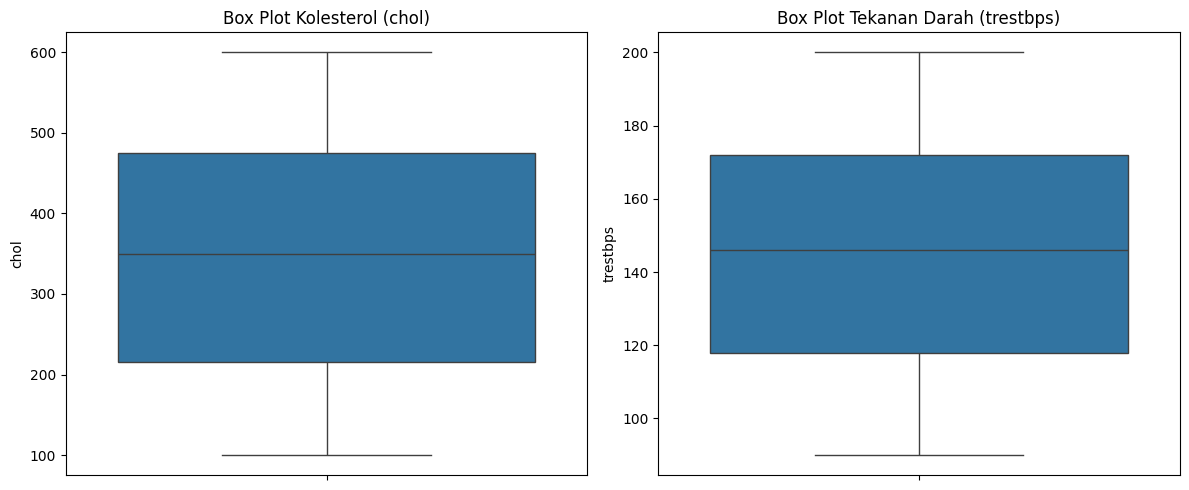

In [ ]:
# 2.1 Koleksi Data & 2.2 Deskripsi Data
print("\n[Tahap 2] Data Understanding")
print("--------------------------------------------------")

try:
    # --- BLOK YANG DIUBAH UNTUK UPLOAD FILE ---
    print("Silakan pilih file dataset (CSV atau XLSX) untuk diunggah.")
    uploaded = files.upload()

    if not uploaded:
        print("\nTidak ada file yang diunggah. Proses dibatalkan.")
        df = None
    else:
        # Mendapatkan nama file pertama yang diunggah
        nama_file = next(iter(uploaded))
        content = uploaded[nama_file]

        print(f"\nMembaca file: {nama_file}...")

        # Membaca file berdasarkan ekstensinya
        if nama_file.endswith('.csv'):
            # Menggunakan io.BytesIO untuk membaca byte content sebagai file
            df = pd.read_csv(io.BytesIO(content))
        elif nama_file.endswith('.xlsx'):
            # Membaca file Excel
            df = pd.read_excel(io.BytesIO(content))
        else:
            print(f"ERROR: Format file '{nama_file}' tidak didukung. Harap unggah file .csv atau .xlsx.")
            df = None

        if df is not None:
            print(f"Berhasil memuat dataset: {nama_file}\n")
    # --- AKHIR BLOK YANG DIUBAH ---

    # Menampilkan 5 baris pertama
    print("Data (5 Baris Pertama):")
    print(df.head())
    print("\n")

    # Menampilkan informasi tipe data dan non-null
    print("Informasi Dataset (Tipe Data & Non-Null):")
    df.info()
    print("\n")

    # 2.3 Eksplorasi Data - Statistik Deskriptif
    print("Statistik Deskriptif (Data Numerik):")
    print(df.describe().T)
    print("\n")

    # 2.3 Eksplorasi Data - Visualisasi Distribusi
    print("Visualisasi Distribusi Data...")

    # Kolom untuk visualisasi distribusi
    kolom_distribusi = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'bmi']

    plt.figure(figsize=(15, 10))
    for i, kolom in enumerate(kolom_distribusi, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[kolom], kde=True)
        plt.title(f'Distribusi {kolom}')
        plt.xlabel(kolom)
        plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

    # Visualisasi distribusi target (heart_disease)
    plt.figure(figsize=(6, 4))
    sns.countplot(x='heart_disease', data=df)
    plt.title('Distribusi Kelas Target (heart_disease)')
    plt.xlabel('Heart Disease (0 = Tidak, 1 = Ya)')
    plt.ylabel('Jumlah')
    plt.show()
    print(df['heart_disease'].value_counts(normalize=True))
    print("\n")

    # 2.3 Eksplorasi Data - Analisis Korelasi
    print("Visualisasi Korelasi (Correlation Heatmap)...")
    plt.figure(figsize=(18, 12))
    # Menghitung korelasi
    corr_matrix = df.corr()
    # Membuat heatmap
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Heatmap Korelasi Antar Fitur')
    plt.show()
    print("\n")

    # 2.4 Data Quality Assessment
    print("Pengecekan Kualitas Data:")
    # Pengecekan Missing Values
    print("Jumlah Missing Values per Kolom:")
    print(df.isnull().sum())
    print("\n")

    # Pengecekan Duplikasi
    print(f"Jumlah Data Duplikat: {df.duplicated().sum()}")
    print("\n")

    # Visualisasi Outliers (Box Plot) untuk 'chol' dan 'trestbps'
    print("Visualisasi Deteksi Outliers (Box Plot)...")
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df['chol'])
    plt.title('Box Plot Kolesterol (chol)')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['trestbps'])
    plt.title('Box Plot Tekanan Darah (trestbps)')

    plt.tight_layout()
    plt.show()
    print("\n")

except StopIteration:
    # Terjadi jika pengguna membatalkan upload
    print("\nProses upload file dibatalkan.")
    df = None
except Exception as e:
    print(f"Terjadi error saat memuat atau memahami data: {e}")
    df = None

**3. DATA PREPARATION**

In [ ]:
if df is not None:
    print("\n[Tahap 3] Data Preparation")
    print("--------------------------------------------------")

    # 3.1 Data Cleaning - Menghapus Duplikat
    jumlah_duplikat = df.duplicated().sum()
    if jumlah_duplikat > 0:
        print(f"Menghapus {jumlah_duplikat} data duplikat...")
        df_cleaned = df.drop_duplicates()
    else:
        df_cleaned = df.copy()
    print(f"Ukuran data setelah hapus duplikat: {df_cleaned.shape}")

    # 3.1 Data Cleaning - Penanganan Outliers (Menggunakan IQR Trimming)
    print("Menangani outliers menggunakan metode IQR...")
    kolom_numerik_outlier = ['trestbps', 'chol', 'thalach', 'oldpeak', 'bmi']
    df_no_outlier = df_cleaned.copy()

    for kolom in kolom_numerik_outlier:
        Q1 = df_no_outlier[kolom].quantile(0.25)
        Q3 = df_no_outlier[kolom].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR

        # Simpan ukuran sebelum trimming
        ukuran_sebelum = df_no_outlier.shape[0]
        # Trimming
        df_no_outlier = df_no_outlier[(df_no_outlier[kolom] >= batas_bawah) & (df_no_outlier[kolom] <= batas_atas)]
        # Ukuran setelah trimming
        ukuran_setelah = df_no_outlier.shape[0]

        print(f"  - Kolom '{kolom}': {ukuran_sebelum - ukuran_setelah} baris outliers dihapus.")

    print(f"Ukuran data setelah penanganan outliers: {df_no_outlier.shape}\n")

    # 3.2 Feature Engineering - One-Hot Encoding
    # Kolom kategorikal yang perlu di-encoding (berdasarkan deskripsi data Anda)
    # 'cp', 'restecg', 'slope', 'thal' adalah nominal/ordinal
    kolom_kategorikal = ['cp', 'restecg', 'slope', 'thal']
    print(f"Melakukan One-Hot Encoding pada kolom: {kolom_kategorikal}...")

    # Menggunakan pd.get_dummies
    df_final = pd.get_dummies(df_no_outlier, columns=kolom_kategorikal, drop_first=True)

    print("Data setelah One-Hot Encoding (5 Baris Pertama):")
    print(df_final.head())
    print(f"Ukuran data final: {df_final.shape}\n")

    # 3.3 Data Integration - Tidak diperlukan (sesuai deskripsi)

    # 3.4 Data Formatting - Pemisahan Fitur dan Target
    print("Memisahkan Fitur (X) dan Target (y)...")
    TARGET_VAR = 'heart_disease'

    X = df_final.drop(columns=[TARGET_VAR])
    y = df_final[TARGET_VAR]

    print(f"Bentuk X (Fitur): {X.shape}")
    print(f"Bentuk y (Target): {y.shape}\n")

    # 3.4 Data Formatting - Pembagian Data (Train-Test Split)
    print("Membagi data menjadi data Latih (80%) dan data Uji (20%)...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"  - X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"  - X_test: {X_test.shape}, y_test: {y_test.shape}\n")

    # 3.4 Data Formatting - Normalization/Standardization
    print("Melakukan Normalisasi Fitur (Min-Max Scaling)...")

    # Ingin menormalisasi semua fitur
    kolom_scaling = X_train.columns

    scaler = MinMaxScaler()

    # Fit scaler HANYA pada data latih
    X_train_scaled = scaler.fit_transform(X_train[kolom_scaling])
    # Transform data uji menggunakan scaler yang sama
    X_test_scaled = scaler.transform(X_test[kolom_scaling])

    # Mengubah kembali ke DataFrame untuk kemudahan (opsional, tapi baik)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=kolom_scaling, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=kolom_scaling, index=X_test.index)

    print("Data Latih setelah Scaling (5 Baris Pertama):")
    print(X_train_scaled.head())
    print("\n")


[Tahap 3] Data Preparation
--------------------------------------------------
Ukuran data setelah hapus duplikat: (3069, 17)
Menangani outliers menggunakan metode IQR...
  - Kolom 'trestbps': 0 baris outliers dihapus.
  - Kolom 'chol': 0 baris outliers dihapus.
  - Kolom 'thalach': 0 baris outliers dihapus.
  - Kolom 'oldpeak': 0 baris outliers dihapus.
  - Kolom 'bmi': 0 baris outliers dihapus.
Ukuran data setelah penanganan outliers: (3069, 17)

Melakukan One-Hot Encoding pada kolom: ['cp', 'restecg', 'slope', 'thal']...
Data setelah One-Hot Encoding (5 Baris Pertama):
   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  smoking  \
0   67    1       111   536    0       88      0      1.3   2        1   
1   57    1       109   107    0      119      0      5.4   0        0   
2   43    1       171   508    0      113      0      3.7   0        1   
3   71    0        90   523    0      152      0      4.7   1        1   
4   36    1       119   131    0      128      0   